In [17]:
import astropy.units as u
import astropy.constants as c
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import sys 
sys.path.append('/Users/clairewilliams/opt/anaconda3/lib/python3.9/site-packages')
sys.path.append('../model-timescales/src')
import pandas
from timescales.data import build_bulk_energy_grid
from timescales import TimescaleEnsemble
from timescales.analysis.model import create_dynamical_model

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(71,0.27,Ob0=0.044, Tcmb0=2.726 *u.K)

In [2]:
masses_array   = np.logspace(4, 8, 10) * u.Msun
radii_array    = np.logspace(-0.7, 2, 10) * u.pc
velocity_array = np.logspace(-0.7, 2.2, 10) * u.km/u.s

grid = build_bulk_energy_grid(masses_array, radii_array, velocity_array,
                              alpha=3/5, energy_unit=u.erg)


# Example: access aligned arrays
M = grid['M']   # Msun
R = grid['R']   # pc
V = grid['V']   # km/s
K = grid['K']   # erg
U = grid['U']   # erg

print(len(M), len(R), len(V), len(K), len(U))  # -> 1_000_000 each (100*100*100

167 167 167 167 167


In [44]:
pl_175_1Msun = TimescaleEnsemble(grid, 
                    densityModel="power-law",
                    timescales_kwargs={'cosmology':cosmo},
                    profile_kwargs={"alpha":1.75})

Using power-law model with properties:
alpha=1.75
Using parameters for timescale evaluation
cosmology=FlatLambdaCDM(H0=71.0 km / (Mpc s), Om0=0.27, Tcmb0=2.726 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.044)
No imf arguments given. Defaulting to 'salpeter'.


In [45]:
model_175_1Msun_salpeter = create_dynamical_model(pl_175_1Msun)

will use defaults for  {'e': 0.0, 'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}
Using default z = 12 since no redshift provided
Using nearest neighbor for interaction type.


/Users/clairewilliams/Research/Calculations/timescale-plots/../model-timescales/src/timescales/physics/halo_environment.py:135: RuntimeWarning: invalid value encountered in divide
  normalization_offset = stfunction17/stfunction


collisions occur in 159 systems


In [46]:
model_175_1Msun_salpeter.keys()

dict_keys(['mass', 'radius', 'velocity', 'kinetic', 'potential', 't_ms', 't_merger', 'coll_occur_within_tmin', 'N_collisions', 'N_collisions_massloss'])

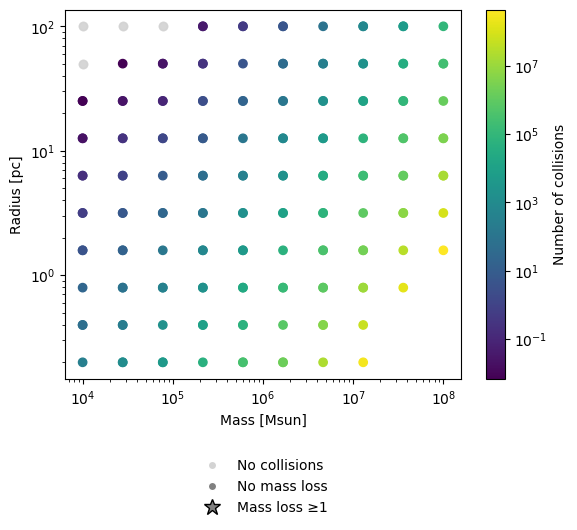

In [50]:

x = model['mass'] * u.Msun
y = model['radius'] * u.pc
c = np.array(model['N_collisions'])
mflag = np.array(model['N_collisions_massloss'])  # new flag array

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Mask zeros for log-scaling
c_masked = np.ma.masked_equal(c, 0)
norm = mcolors.LogNorm(vmin=c_masked.min(), vmax=c_masked.max())
cmap = plt.cm.viridis

# --- Separate the two populations by shape ---
mask_star = mflag >= 1   # star markers
mask_circle = ~mask_star # circle markers

# Plot circles (no mass loss)
sc1 = ax.scatter(x[mask_circle], y[mask_circle], 
                 c=np.ma.masked_equal(c[mask_circle], 0), 
                 cmap=cmap, norm=norm, marker='o')

# Plot stars (mass loss ≥1)
sc2 = ax.scatter(x[mask_star], y[mask_star], 
                 c=np.ma.masked_equal(c[mask_star], 0), 
                 cmap=cmap, norm=norm, marker='*', s=120, edgecolor='k')

# Add explicit grey points for zeros
ax.scatter(x[c == 0], y[c == 0], color="lightgrey", marker='o', alpha=0.7, label="0 collisions")

# --- Colorbar ---
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cb.set_label("Number of collisions")

# Add legend for shapes
legend_handles = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='lightgrey',
               label='No collisions'),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='gray',
               label='No mass loss'),
    plt.Line2D([], [], marker='*', color='w', markerfacecolor='gray',
               markeredgecolor='k', markersize=12, label='Mass loss ≥1')
]

ax.legend(
    handles=legend_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.4),
    frameon=False
)
ax.set_xlabel("Mass [Msun]")
ax.set_ylabel("Radius [pc]")

plt.show()


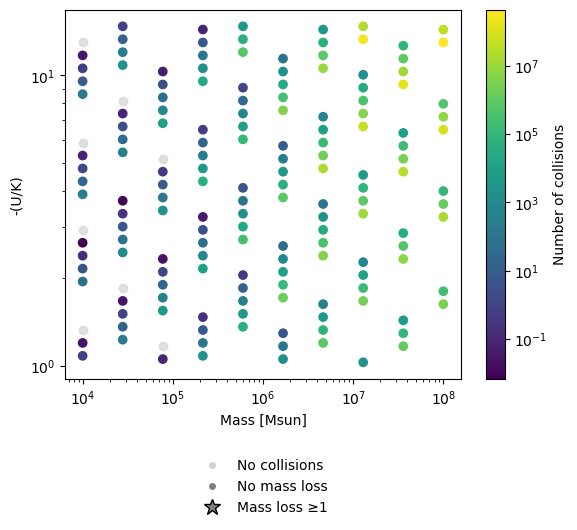

In [53]:

x = model['mass'] * u.Msun
y = -np.array(model['potential']*u.erg)/np.array(model['kinetic']*u.erg)
c = np.array(model['N_collisions'])

mflag = np.array(model['N_collisions_massloss'])  # new flag array

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Mask zeros for log-scaling
c_masked = np.ma.masked_equal(c, 0)
norm = mcolors.LogNorm(vmin=c_masked.min(), vmax=c_masked.max())
cmap = plt.cm.viridis

# --- Separate the two populations by shape ---
mask_star = mflag >= 1   # star markers
mask_circle = ~mask_star # circle markers

# Plot circles (no mass loss)
sc1 = ax.scatter(x[mask_circle], y[mask_circle], 
                 c=np.ma.masked_equal(c[mask_circle], 0), 
                 cmap=cmap, norm=norm, marker='o')

# Plot stars (mass loss ≥1)
sc2 = ax.scatter(x[mask_star], y[mask_star], 
                 c=np.ma.masked_equal(c[mask_star], 0), 
                 cmap=cmap, norm=norm, marker='*', s=120, edgecolor='k')

# Add explicit grey points for zeros
ax.scatter(x[c == 0], y[c == 0], color="lightgrey", marker='o', alpha=0.7, label="0 collisions")

# --- Colorbar ---
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cb.set_label("Number of collisions")

# Add legend for shapes
legend_handles = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='lightgrey',
               label='No collisions'),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='gray',
               label='No mass loss'),
    plt.Line2D([], [], marker='*', color='w', markerfacecolor='gray',
               markeredgecolor='k', markersize=12, label='Mass loss ≥1')
]

ax.legend(
    handles=legend_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.4),
    frameon=False
)
ax.set_xlabel("Mass [Msun]")
ax.set_ylabel("-(U/K)")

plt.show()



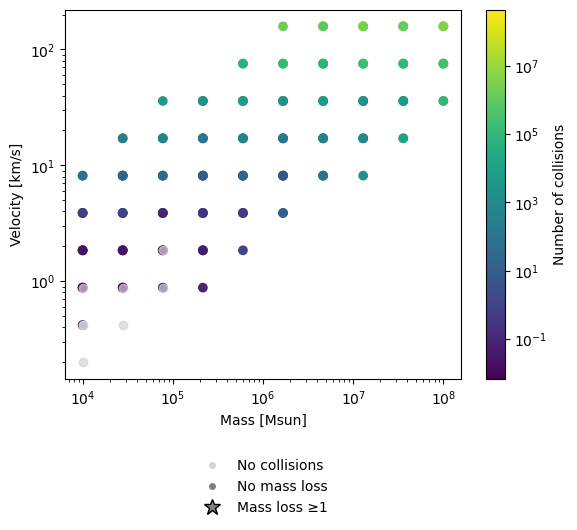

In [54]:

model = model_175_1Msun_salpeter

x = model['mass'] * u.Msun
y = model['velocity'] * (u.km/u.s)
c = np.array(model['N_collisions'])
mflag = np.array(model['N_collisions_massloss'])  # new flag array

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

# Mask zeros for log-scaling
c_masked = np.ma.masked_equal(c, 0)
norm = mcolors.LogNorm(vmin=c_masked.min(), vmax=c_masked.max())
cmap = plt.cm.viridis

# --- Separate the two populations by shape ---
mask_star = mflag >= 1   # star markers
mask_circle = ~mask_star # circle markers

# Plot circles (no mass loss)
sc1 = ax.scatter(x[mask_circle], y[mask_circle], 
                 c=np.ma.masked_equal(c[mask_circle], 0), 
                 cmap=cmap, norm=norm, marker='o')

# Plot stars (mass loss ≥1)
sc2 = ax.scatter(x[mask_star], y[mask_star], 
                 c=np.ma.masked_equal(c[mask_star], 0), 
                 cmap=cmap, norm=norm, marker='*', s=120, edgecolor='k')

# Add explicit grey points for zeros
ax.scatter(x[c == 0], y[c == 0], color="lightgrey", marker='o', alpha=0.7, label="0 collisions")

# --- Colorbar ---
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cb.set_label("Number of collisions")

# Add legend for shapes
legend_handles = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='lightgrey',
               label='No collisions'),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='gray',
               label='No mass loss'),
    plt.Line2D([], [], marker='*', color='w', markerfacecolor='gray',
               markeredgecolor='k', markersize=12, label='Mass loss ≥1')
]

ax.legend(
    handles=legend_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.4),
    frameon=False
)
ax.set_xlabel("Mass [Msun]")
ax.set_ylabel("Velocity [km/s]")

plt.show()


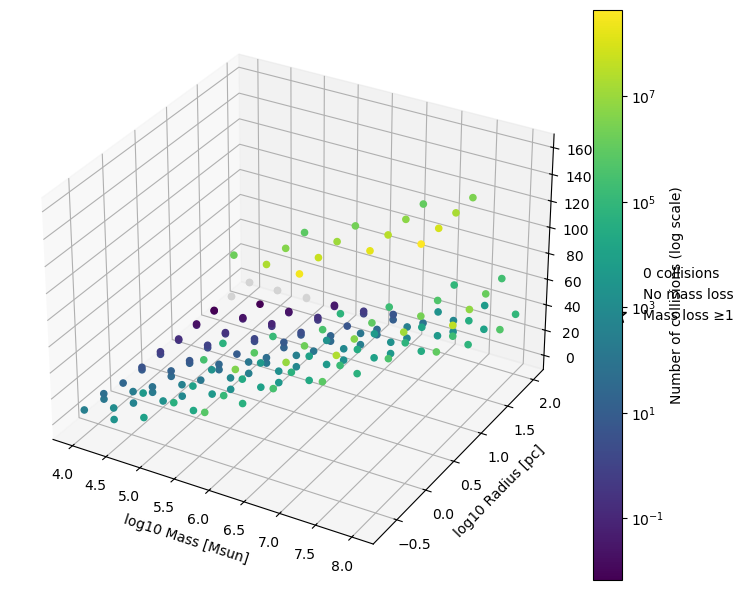

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed to enable 3D)
import astropy.units as u

model = model_175_1Msun_salpeter

# --- data ---
x = (model['mass'] * u.Msun).to_value(u.Msun)
y = (model['radius'] * u.pc).to_value(u.pc)
z = (model['velocity'] * (u.km/u.s)).to_value(u.km/u.s)   # <-- Z axis
c = np.array(model['N_collisions'])
mflag = np.array(model['N_collisions_massloss'])

# --- masks & color scaling ---
c_masked = np.ma.masked_equal(c, 0)  # zeros masked (will be grey)
norm = mcolors.LogNorm(vmin=c_masked.min(), vmax=c_masked.max())
cmap = plt.cm.viridis

mask_star = mflag >= 1
mask_circle = ~mask_star

# --- figure/axes ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# If your mpl version supports it, this works:
# ax.set_xscale('log'); ax.set_yscale('log')
# Many mpl versions don’t apply log to 3D nicely; if so, comment the 2 lines above
# and instead transform x/y to log10 values and relabel:
USE_FALLBACK_LOG = True
if USE_FALLBACK_LOG:
    X, Y = np.log10(x), np.log10(y)
    ax.set_xlabel("log10 Mass [Msun]")
    ax.set_ylabel("log10 Radius [pc]")
else:
    X, Y = x, y
    ax.set_xlabel("Mass [Msun]")
    ax.set_ylabel("Radius [pc]")

ax.set_zlabel("Velocity [km s$^{-1}$]")

# --- plot by shape ---
# Circles (no mass loss)
ax.scatter(
    X[mask_circle], Y[mask_circle], z[mask_circle],
    c=np.ma.masked_equal(c[mask_circle], 0), cmap=cmap, norm=norm,
    marker='o', depthshade=False
)

# Stars (mass loss ≥ 1)
ax.scatter(
    X[mask_star], Y[mask_star], z[mask_star],
    c=np.ma.masked_equal(c[mask_star], 0), cmap=cmap, norm=norm,
    marker='*', s=120, edgecolor='k', depthshade=False
)

# Explicit grey points for zeros (kept as circles)
ax.scatter(
    X[c == 0], Y[c == 0], z[c == 0],
    color="lightgrey", marker='o', alpha=0.8, label="0 collisions", depthshade=False
)

# --- colorbar (log for >0) ---
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, pad=0.02, fraction=0.05)
cb.set_label("Number of collisions (log scale)")

# Add a legend entry for the zero patch and shapes, placed outside
legend_handles = [
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='lightgrey',
               label='0 collisions'),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='gray',
               label='No mass loss'),
    plt.Line2D([], [], marker='*', color='w', markerfacecolor='gray',
               markeredgecolor='k', markersize=12, label='Mass loss ≥1')
]
ax.legend(
    handles=legend_handles,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.tight_layout()
plt.show()
